In [1]:
from importlib import reload
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
# import sys
# sys.path.insert(0, '/Users/00075868/Dropbox/AnalysisTools/')

import scipy.integrate as spi
import h5py

import merger_tree_tools as mtt
import snapshot_tools as st
import halo_tools as ht
import galaxy_tools as gt
import profile_tools as pt
mtt=reload(mtt)
st=reload(st)
ht=reload(ht)
gt=reload(gt)

In [2]:
data = np.loadtxt('/fred/oz009/mzhang/TheThreeHundred/GadgetX/NewMDCLUSTER_0001/GadgetX-NewMDCLUSTER_0001.snap_128.z0.000.AHF_halos', skiprows=1, max_rows=1)
# data = np.loadtxt('/fred/oz009/mzhang/TheThreeHundred/GadgetX/NewMDCLUSTER_0001/GadgetX-NewMDCLUSTER_0001.snap_128.z0.000.AHF_halos', delimiter=',', names=True, dtype=None, encoding=None, max_rows=1)

# print(data)
# print(data.dtype.names)

import pandas as pd

# Load the data
file_path = '/fred/oz009/mzhang/TheThreeHundred/GadgetX/NewMDCLUSTER_0001/GadgetX-NewMDCLUSTER_0001.snap_128.z0.000.AHF_halos'
data = pd.read_csv(file_path)

# Display the column names and first few rows
print(data.columns)
print('--------------')
print(data.head())


Index(['#ID(1)\thostHalo(2)\tnumSubStruct(3)\tMvir(4)\tnpart(5)\tXc(6)\tYc(7)\tZc(8)\tVXc(9)\tVYc(10)\tVZc(11)\tRvir(12)\tRmax(13)\tr2(14)\tmbp_offset(15)\tcom_offset(16)\tVmax(17)\tv_esc(18)\tsigV(19)\tlambda(20)\tlambdaE(21)\tLx(22)\tLy(23)\tLz(24)\tb(25)\tc(26)\tEax(27)\tEay(28)\tEaz(29)\tEbx(30)\tEby(31)\tEbz(32)\tEcx(33)\tEcy(34)\tEcz(35)\tovdens(36)\tnbins(37)\tfMhires(38)\tEkin(39)\tEpot(40)\tSurfP(41)\tPhi0(42)\tcNFW(43)\tn_gas(44)\tM_gas(45)\tlambda_gas(46)\tlambdaE_gas(47)\tLx_gas(48)\tLy_gas(49)\tLz_gas(50)\tb_gas(51)\tc_gas(52)\tEax_gas(53)\tEay_gas(54)\tEaz_gas(55)\tEbx_gas(56)\tEby_gas(57)\tEbz_gas(58)\tEcx_gas(59)\tEcy_gas(60)\tEcz_gas(61)\tEkin_gas(62)\tEpot_gas(63)\tn_star(64)\tM_star(65)\tlambda_star(66)\tlambdaE_star(67)\tLx_star(68)\tLy_star(69)\tLz_star(70)\tb_star(71)\tc_star(72)\tEax_star(73)\tEay_star(74)\tEaz_star(75)\tEbx_star(76)\tEby_star(77)\tEbz_star(78)\tEcx_star(79)\tEcy_star(80)\tEcz_star(81)\tEkin_star(82)\tEpot_star(83)\tmean_z_gas(84)\tmean_z_star(85

In [3]:
# file_path = '/fred/oz009/mzhang/TheThreeHundred/GadgetX/NewMDCLUSTER_0001/GadgetX-NewMDCLUSTER_0001.snap_128.z0.000.AHF_halos' 
# file = h5py.File(file_path, 'r')

# def list_hdf5_objects(obj, level=0):
#     if isinstance(obj, h5py.Group):
#         print("  " * level + f"Group: {obj.name}")
#         for key in obj.keys():
#             list_hdf5_objects(obj[key], level + 1)
#     elif isinstance(obj, h5py.Dataset):
#         print("  " * level + f"Dataset: {obj.name}")
# #     elif isinstance(obj, h5py.Galaxy):
# #         print("  " * level + f"Galaxy: {obj.name}")

# list_hdf5_objects(file)

In [4]:
snap=st.SnapshotTools('/fred/oz009/mzhang/TheThreeHundred/GadgetX/NewMDCLUSTER_0001/snap_128','SNAP2')
halo=ht.HaloTools('/fred/oz009/mzhang/TheThreeHundred/GadgetX/NewMDCLUSTER_0001/GadgetX-NewMDCLUSTER_0001.snap_128.z0.000','AHF')

snap.ReadSnapshot()
snap.UnitConversion(convert_to_physical=False,convert_to_littleh=False)
print('----------------------------------------------')
halo.ReadHaloCatalogue()

Reading data from /fred/oz009/mzhang/TheThreeHundred/GadgetX/NewMDCLUSTER_0001/snap_128
Number of particles: 0030370123
Number of particles in mass block: 0030370123
----------------------------------------------
/fred/oz009/mzhang/TheThreeHundred/GadgetX/NewMDCLUSTER_0001/GadgetX-NewMDCLUSTER_0001.snap_128.z0.000.AHF_halos


In [5]:
# Separate particles by type - dark matter (snap.dm), gas (snap.gas), stars (snap.star), and black holes (snap.bh)
snap.LoadParticlesByType('all')

def plot_components(pos,poscen,size,lbox,cubic=False,colourmap='plasma',grid_size=512,**kwargs):    
    if cubic==True:
        ipick=st.select_particles(pos,poscen,size,geometry='cubic',periodic=True,scale_length=lbox)
    else:
        ipick=st.select_particles(pos,poscen,size,geometry='spherical',periodic=True,scale_length=lbox)        
    dpos=pos[ipick]-poscen
    dpos=np.where(dpos>0.5*lbox,dpos-lbox,dpos)
    dpos=np.where(dpos<-0.5*lbox,dpos+lbox,dpos)    
    fig=plt.hexbin(dpos[:,0],dpos[:,2],bins='log',gridsize=grid_size,cmap=colourmap)
    return fig

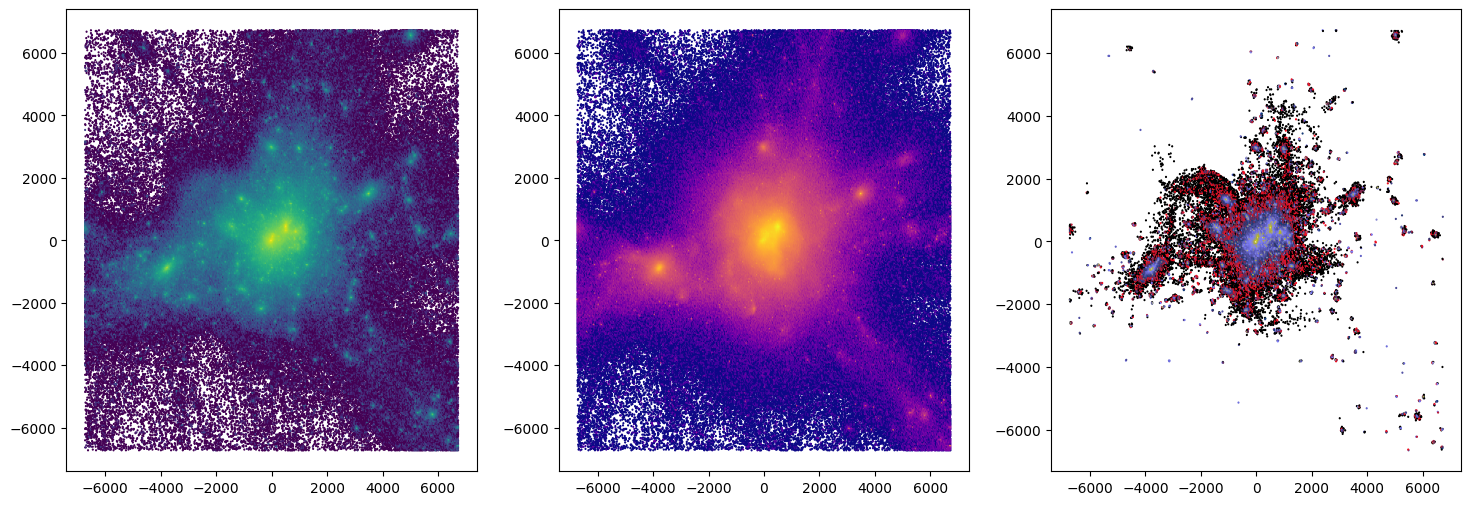

In [6]:
ihalo=0
fig = plt.figure(figsize=(18, 6))
gs = GridSpec(nrows=1, ncols=3)
# Plot DM (85%)
ax0 = fig.add_subplot(gs[0, 0])
figd=plot_components(snap.dm.pos,halo.GroupPos[ihalo],3*halo.GroupR200[ihalo],snap.BoxSize,colourmap='viridis',grid_size=512,cubic=True)
# Plot gas (12%)
ax1 = fig.add_subplot(gs[0, 1])
figg=plot_components(snap.gas.pos,halo.GroupPos[ihalo],3*halo.GroupR200[ihalo],snap.BoxSize,colourmap='plasma',grid_size=512,cubic=True)
# Plot stars (3%)
ax2 = fig.add_subplot(gs[0, 2])
figs=plot_components(snap.star.pos,halo.GroupPos[ihalo],3*halo.GroupR200[ihalo],snap.BoxSize,colourmap='gist_stern',grid_size=512,cubic=True)


In [8]:
snap.Redshift

-2.220446049250313e-16

/tmp/ipykernel_3096243/2973276982.py:25: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(rdav/size),np.log10(rhodav/rhonorm),color='blue',label='DM')
/tmp/ipykernel_3096243/2973276982.py:26: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(rgav/size),np.log10(rhogav/rhonorm),color='green',label='Gas (Mass)')
/tmp/ipykernel_3096243/2973276982.py:30: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(rsav/size),np.log10(rhosav/rhonorm),color='red',label='Stars')
/tmp/ipykernel_3096243/2973276982.py:32: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(rsav/size),np.log10((rhosav+rhodav)/rhonorm),color='black',label='DM + Stars')


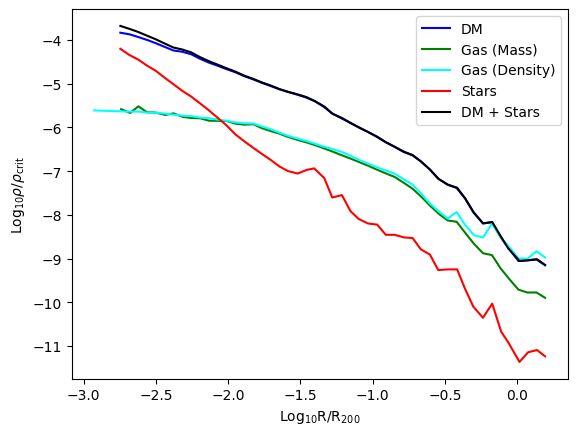

In [7]:
profiles=pt.ProfileTools()

ihalo=0
numbins=50
radius_min=0.005*halo.GroupR200[ihalo]
radius_max=5.0*halo.GroupR200[ihalo]
radial_limits=[radius_min,radius_max]
fsize=3
size=fsize*halo.GroupR200[ihalo]
centre=halo.GroupPos[ihalo]
lbox=snap.BoxSize
rhonorm=27.755

# Get DM profile
rdav,rhodav=profiles.plot_mass_density_profile(snap.dm.pos,snap.dm.mass,centre,fsize*size,lbox,radial_limits,numbins,geometry='spherical',type='average')

# Get gas profile
rgav,rhogav=profiles.plot_mass_density_profile(snap.gas.pos,snap.gas.mass,centre,fsize*size,lbox,radial_limits,numbins,geometry='spherical',type='average')
rgav2,rhogmed=profiles.plot_mass_density_profile(snap.gas.pos,snap.gas.density,centre,fsize*size,lbox,radial_limits,numbins,geometry='spherical',type='median')
rgav3,umed=profiles.plot_mass_density_profile(snap.gas.pos,snap.gas.internal_energy,centre,fsize*size,lbox,radial_limits,numbins,geometry='spherical',type='median')

# Get star profile
rsav,rhosav=profiles.plot_mass_density_profile(snap.star.pos,snap.star.mass,centre,fsize*size,lbox,radial_limits,numbins,geometry='spherical',type='average')

plt.plot(np.log10(rdav/size),np.log10(rhodav/rhonorm),color='blue',label='DM')
plt.plot(np.log10(rgav/size),np.log10(rhogav/rhonorm),color='green',label='Gas (Mass)')
plt.plot(np.log10(rgav2/size),np.log10(rhogmed/rhonorm),color='cyan',label='Gas (Density)')
# plt.plot(np.log10(rgav2/size),np.log10(umed),color='magenta',label='Gas')

plt.plot(np.log10(rsav/size),np.log10(rhosav/rhonorm),color='red',label='Stars')

plt.plot(np.log10(rsav/size),np.log10((rhosav+rhodav)/rhonorm),color='black',label='DM + Stars')

plt.xlabel(r'${\rm Log}_{10} {\rm R/R}_{200}$')
plt.ylabel(r'${\rm Log}_{10} \rho/\rho_{\rm crit}$')

plt.legend()

/tmp/ipykernel_3096243/281709766.py:19: RuntimeWarning: divide by zero encountered in log10
  plt.plot(rgav_1/size,np.log10(1e10*rhogav/rhonorm),color='green',label='Density (average)')


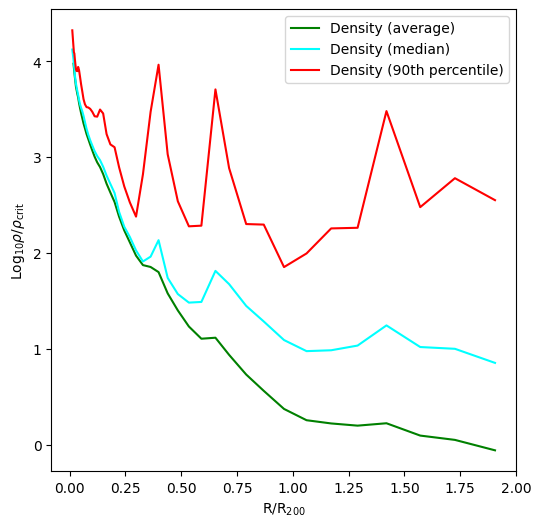

In [8]:
# gas density profiles

ihalo=0
numbins=50
radius_min=0.05*halo.GroupR200[ihalo]
radius_max=6.0*halo.GroupR200[ihalo]
radial_limits=[radius_min,radius_max]
fsize=3
size=fsize*halo.GroupR200[ihalo]
centre=halo.GroupPos[ihalo]
lbox=snap.BoxSize
rhonorm=27.755

fig = plt.figure(figsize=(6, 6))
rgav_1,rhogav=profiles.plot_mass_density_profile(snap.gas.pos,snap.gas.mass,centre,fsize*size,lbox,radial_limits,numbins,geometry='spherical',type='average')
rgav_2,rhogmed=profiles.plot_mass_density_profile(snap.gas.pos,snap.gas.density,centre,fsize*size,lbox,radial_limits,numbins,geometry='spherical',type='median')
rgav_3,rhog90=profiles.plot_mass_density_profile(snap.gas.pos,snap.gas.density,centre,fsize*size,lbox,radial_limits,numbins,geometry='spherical',type='90')

plt.plot(rgav_1/size,np.log10(1e10*rhogav/rhonorm),color='green',label='Density (average)')
plt.plot(rgav_2/size,np.log10(1e10*rhogmed/rhonorm),color='cyan',label='Density (median)')
plt.plot(rgav_3/size,np.log10(1e10*rhog90/rhonorm),color='red',label='Density (90th percentile)')
plt.xlabel(r'${\rm R/R}_{200}$')
plt.ylabel(r'${\rm Log}_{10} \rho/\rho_{\rm crit}$')

plt.legend()
# plt.savefig("./figures/gas_density_profiles_percentile.png")

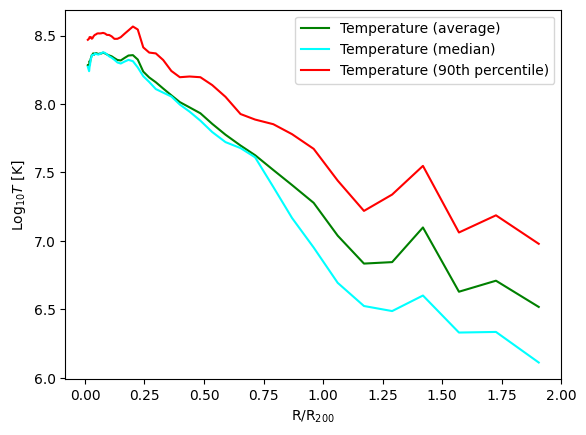

In [9]:
# gas temperature profiles T = (gamma-1) * m_H / k_b * u   
# u is internal energy
# m_H = 1.67e-24 grams is the mass of hydrogen atom
# k_b = 1.38e-16 erg/K is the Boltzmann constant CGS system 1 erg = 1e-7 J 

k_b = 1.38e-16 
m_H = 1.67e-24
gamma = 5/3
kk = (gamma-1)*m_H/k_b

ihalo=0
numbins=50
radius_min=0.05*halo.GroupR200[ihalo]
radius_max=6.0*halo.GroupR200[ihalo]
radial_limits=[radius_min,radius_max]
fsize=3
size=fsize*halo.GroupR200[ihalo]
centre=halo.GroupPos[ihalo]
lbox=snap.BoxSize
rhonorm=27.755

rgav_1,umed_av=profiles.plot_mass_density_profile(snap.gas.pos,snap.gas.internal_energy,centre,fsize*size,lbox,radial_limits,numbins,geometry='spherical',type='average_T')
rgav_2,umed_med=profiles.plot_mass_density_profile(snap.gas.pos,snap.gas.internal_energy,centre,fsize*size,lbox,radial_limits,numbins,geometry='spherical',type='median')
rgav_3,umed_90=profiles.plot_mass_density_profile(snap.gas.pos,snap.gas.internal_energy,centre,fsize*size,lbox,radial_limits,numbins,geometry='spherical',type='90')

plt.plot(rgav_1/size,np.log10(1e10*umed_av*kk),color='green',label='Temperature (average)')
plt.plot(rgav_2/size,np.log10(1e10*umed_med*kk),color='cyan',label='Temperature (median)')
plt.plot(rgav_3/size,np.log10(1e10*umed_90*kk),color='red',label='Temperature (90th percentile)')

plt.xlabel(r'${\rm R/R}_{200}$')
plt.ylabel(r'${\rm Log}_{10} T$ [K]')

plt.legend()
# plt.savefig("./figures/gas_temperature_profiles_percentile.png")

In [10]:
# P_200

# ipick=np.logical_and(snap.pos[:,2]<40,snap.pos[:,2]>20)              # particle  # 0-125
# jpick=np.logical_and(halo.GroupPos[:,2]<40,halo.GroupPos[:,2]>20)    # halo

ihalo=0
lbox=snap.BoxSize
rhonorm=27.755

pos=snap.gas.pos-halo.GroupPos[ihalo]
# vel=snap.vel[ipick]-halo.GroupVel[jpick][i]
r=np.sqrt(pos[:,0]**2+pos[:,1]**2+pos[:,2]**2)
keep_ids=np.where(r<halo.GroupR200[ihalo])

kkk = k_b/(0.59*m_H)
volume=(4*np.pi/3.)*halo.GroupR200[ihalo]**3
pressure = np.sum(snap.gas.density[keep_ids]*snap.gas.internal_energy[keep_ids])/volume

p200 = 1e10*pressure*kkk
print(pressure,p200)

0.0002979138417792323 417254746427829.56


/tmp/ipykernel_3096243/2076890191.py:20: RuntimeWarning: divide by zero encountered in log10
  plt.plot(rgav_1/size,np.log10(1e10*umed_av*kkk),color='green',label='Pressure (average)')


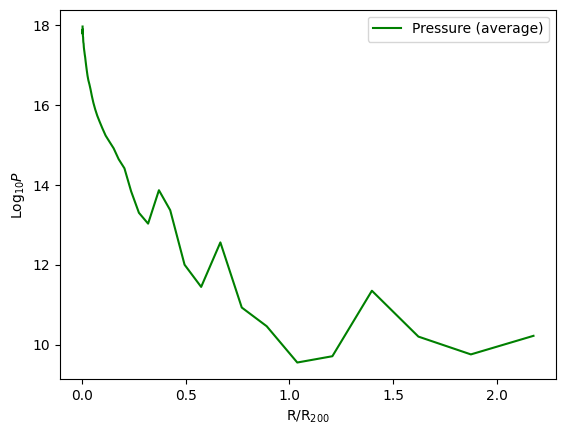

In [47]:
# gas pressure profiles

kkk = k_b/(0.59*m_H)

ihalo=0
numbins=50
radius_min=0.005*halo.GroupR200[ihalo]
radius_max=7.0*halo.GroupR200[ihalo]
radial_limits=[radius_min,radius_max]
fsize=3
size=fsize*halo.GroupR200[ihalo]
centre=halo.GroupPos[ihalo]
lbox=snap.BoxSize
rhonorm=27.755

rgav_1,umed_av=profiles.plot_mass_density_profile(snap.gas.pos,snap.gas.density*snap.gas.internal_energy,centre,fsize*size,lbox,radial_limits,numbins,geometry='spherical',type='average')
# rgav_2,umed_med=profiles.plot_mass_density_profile(snap.gas.pos,snap.gas.density*snap.gas.internal_energy,centre,fsize*size,lbox,radial_limits,numbins,geometry='spherical',type='med')
# rgav_3,umed_90=profiles.plot_mass_density_profile(snap.gas.pos,snap.gas.density*snap.gas.internal_energy,centre,fsize*size,lbox,radial_limits,numbins,geometry='spherical',type='90')

plt.plot(rgav_1/size,np.log10(1e10*umed_av*kkk),color='green',label='Pressure (average)')
# plt.plot(rgav_2/size,np.log10(1e10*umed_med*kkk),color='cyan',label='Pressure (median)')
# plt.plot(rgav_3/size,np.log10(1e10*umed_90*kkk),color='red',label='Pressure (90th percentile)')

plt.xlabel(r'${\rm R/R}_{200}$')
plt.ylabel(r'${\rm Log}_{10} P$')

plt.legend()

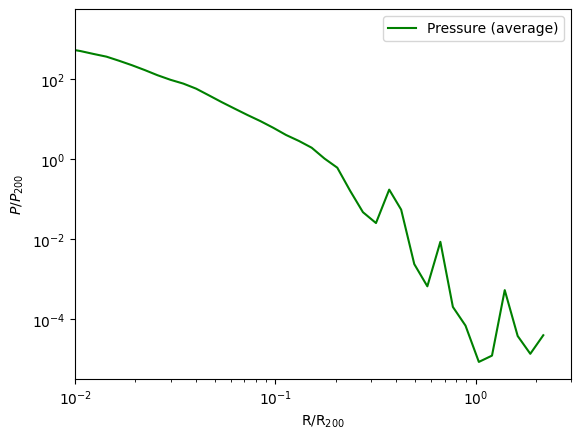

In [30]:
plt.plot(rgav_1/size,1e10*umed_av*kkk/p200,color='green',label='Pressure (average)')
plt.xlabel(r'${\rm R/R}_{200}$')
plt.ylabel(r'$P/P_{200}$')
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.01,3)
plt.legend()

0
1


(0.01, 3)

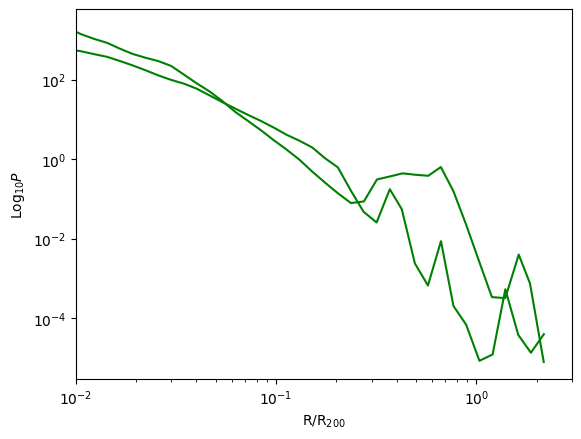

In [50]:
for ihalo in range(2):
    print(ihalo)
    numbins=50
    radius_min=0.005*halo.GroupR200[ihalo]
    radius_max=7.0*halo.GroupR200[ihalo]
    radial_limits=[radius_min,radius_max]
    fsize=3
    size=fsize*halo.GroupR200[ihalo]
    centre=halo.GroupPos[ihalo]
    lbox=snap.BoxSize
    rhonorm=27.755

    pos=snap.gas.pos-halo.GroupPos[ihalo]
    r=np.sqrt(pos[:,0]**2+pos[:,1]**2+pos[:,2]**2)
    keep_ids=np.where(r<halo.GroupR200[ihalo])

    kkk = k_b/(0.59*m_H)
    volume=(4*np.pi/3.)*halo.GroupR200[ihalo]**3
    pressure = np.sum(snap.gas.density[keep_ids]*snap.gas.internal_energy[keep_ids])/volume
    p200 = 1e10*pressure*kkk

    rgav_10,umed_av_10=profiles.plot_mass_density_profile(snap.gas.pos,snap.gas.density*snap.gas.internal_energy,centre,fsize*size,lbox,radial_limits,numbins,geometry='spherical',type='average')
    plt.plot(rgav_10/size,1e10*umed_av_10*kkk/p200,color='green',label='Pressure (average)')

plt.xlabel(r'${\rm R/R}_{200}$')
plt.ylabel(r'${\rm Log}_{10} P$')
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.01,3)
# plt.legend()

In [31]:
# # gas pressure profiles

# kkk = k_b/(0.59*m_H)

# ihalo=0
# numbins=50
# radius_min=0.05*halo.GroupR200[ihalo]
# radius_max=6.0*halo.GroupR200[ihalo]
# radial_limits=[radius_min,radius_max]
# fsize=3
# size=fsize*halo.GroupR200[ihalo]
# centre=halo.GroupPos[ihalo]
# lbox=snap.BoxSize
# rhonorm=27.755

# rgav_1,umed_av=profiles.plot_mass_density_profile(snap.gas.pos,snap.gas.density*snap.gas.internal_energy,centre,fsize*size,lbox,radial_limits,numbins,geometry='spherical',type='average')
# # rgav_2,umed_med=profiles.plot_mass_density_profile(snap.gas.pos,snap.gas.density*snap.gas.internal_energy,centre,fsize*size,lbox,radial_limits,numbins,geometry='spherical',type='average_T')
# # rgav_3,umed_90=profiles.plot_mass_density_profile(snap.gas.pos,snap.gas.density*snap.gas.internal_energy,centre,fsize*size,lbox,radial_limits,numbins,geometry='spherical',type='90')

# plt.plot(rgav_1/size,np.log10(1e10*umed_av*kkk),color='green',label='Pressure (average)')
# # plt.plot(rgav_2/size,np.log10(1e10*umed_med*kkk),color='cyan',label='Pressure (median)')
# # plt.plot(rgav_3/size,np.log10(1e10*umed_90*kkk),color='red',label='Pressure (90th percentile)')

# plt.xlabel(r'${\rm R/R}_{200}$')
# plt.ylabel(r'${\rm Log}_{10} P$')

# plt.legend()

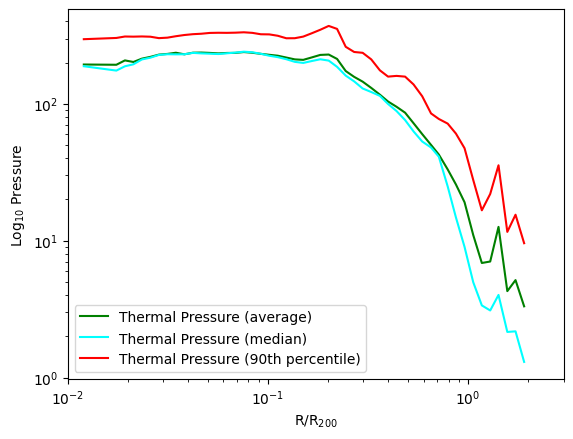

In [32]:
# thermal pressure profiles P_thermal = 3kT/(mu m_p) = 2u/mu    mu = 0.59
# mu = 0.59 is the mean molecular weight for the fully ionized ICM

# plt.plot(rgav_1/size,np.log10(1e10*umed_av*kkk),color='blue',label='Pressure (average)')
# plt.plot(rgav_1/size,1e10*umed_av*kkk/p200,color='blue',label='Pressure (average)')

ihalo=0
numbins=50
radius_min=0.05*halo.GroupR200[ihalo]
radius_max=6.0*halo.GroupR200[ihalo]
radial_limits=[radius_min,radius_max]
fsize=3
size=fsize*halo.GroupR200[ihalo]
centre=halo.GroupPos[ihalo]
lbox=snap.BoxSize
rhonorm=27.755

rgav_1,umed_av=profiles.plot_mass_density_profile(snap.gas.pos,snap.gas.internal_energy,centre,fsize*size,lbox,radial_limits,numbins,geometry='spherical',type='average_T')
rgav_2,umed_med=profiles.plot_mass_density_profile(snap.gas.pos,snap.gas.internal_energy,centre,fsize*size,lbox,radial_limits,numbins,geometry='spherical',type='median')
rgav_3,umed_90=profiles.plot_mass_density_profile(snap.gas.pos,snap.gas.internal_energy,centre,fsize*size,lbox,radial_limits,numbins,geometry='spherical',type='90')

# plt.plot(rgav_1/size,np.log10(1e10*2*umed_av/0.59),color='green',label='Thermal Pressure (average)')
# plt.plot(rgav_2/size,np.log10(1e10*2*umed_med/0.59),color='cyan',label='Thermal Pressure (median)')
# plt.plot(rgav_3/size,np.log10(1e10*2*umed_90/0.59),color='red',label='Thermal Pressure (90th percentile)')

plt.plot(rgav_1/size,1e10*2*umed_av/0.59/p200,color='green',label='Thermal Pressure (average)')
plt.plot(rgav_2/size,1e10*2*umed_med/0.59/p200,color='cyan',label='Thermal Pressure (median)')
plt.plot(rgav_3/size,1e10*2*umed_90/0.59/p200,color='red',label='Thermal Pressure (90th percentile)')


plt.xlabel(r'${\rm R/R}_{200}$')
plt.ylabel(r'${\rm Log}_{10} $ Pressure')
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.01,3)
plt.legend()

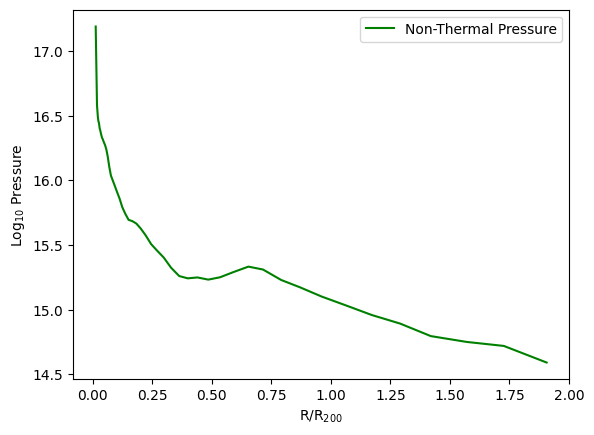

In [33]:
# non-thermal pressure profiles

ihalo=0
numbins=50
radius_min=0.05*halo.GroupR200[ihalo]
radius_max=6.0*halo.GroupR200[ihalo]
radial_limits=[radius_min,radius_max]
fsize=3
size=fsize*halo.GroupR200[ihalo]
centre=halo.GroupPos[ihalo]
lbox=snap.BoxSize
rhonorm=27.755

dpos=snap.gas.pos-centre
dpos=np.where(dpos>0.5*lbox,dpos-lbox,dpos)
dpos=np.where(dpos<-0.5*lbox,dpos+lbox,dpos)
rr=np.sqrt(dpos[:,0]**2+dpos[:,1]**2+dpos[:,2]**2)

rgav_1, vr, sigmar, sigma =profiles.kinematic_radial_profile(r=rr,pos=snap.gas.pos,vel=snap.gas.vel,rmin=radius_min,rmax=radius_max,nbins=numbins)
plt.plot(rgav_1/size,np.log10(1e10*sigmar),color='green',label='Non-Thermal Pressure')
plt.xlabel(r'${\rm R/R}_{200}$')
plt.ylabel(r'${\rm Log}_{10} $ Pressure')

plt.legend()


Text(0, 0.5, '$P_{rand}/P_{tot}$')

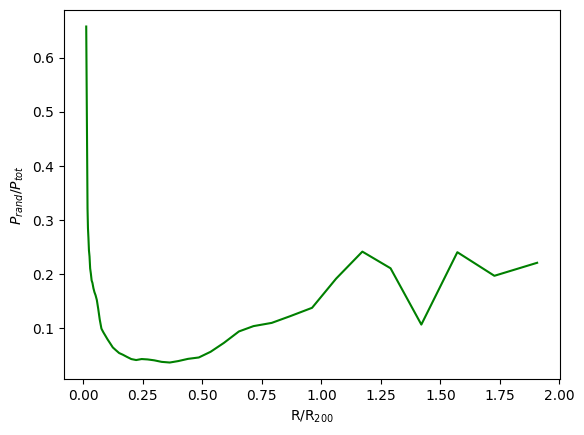

In [34]:
plt.plot(rgav_1/size,sigmar/(2*umed_av/0.59+sigmar),color='green')
plt.xlabel(r'${\rm R/R}_{200}$')
plt.ylabel(r'$P_{rand}/P_{tot}$')
# plt.legend()